# Exploratory Data Analysis (EDA)

# Load the dataset

In [1]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/parvatijay2901/Machine-Learning-with-the-Titanic-dataset-on-Azure/main/Training_data.csv')

# Data analysis

In [2]:
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Impute missing values

In [4]:
import numpy as np

def Impute_missing_values(df):
    df.drop(columns=['Cabin'],inplace=True)
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna('S', inplace=True) 

In [5]:
Impute_missing_values(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Univariate analysis

### Survived

In [7]:
!pip install seaborn

     |████████████████████████████████| 285 kB 8.0 MB/s eta 0:00:01


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Out of 891 passengers, 61.61616161616161% died in the accident


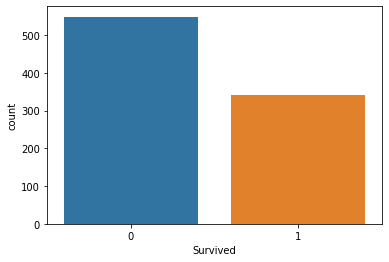

In [8]:
import seaborn as sns

sns.countplot(df['Survived'])
death_percent=(df['Survived'].value_counts().values[0]/891)*100

print("Out of 891 passengers, {}% died in the accident".format(death_percent))

### Pclass


3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


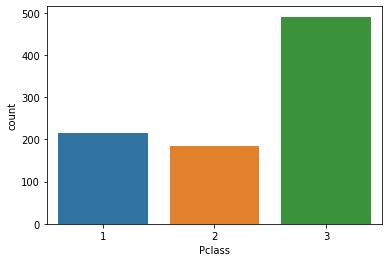

In [9]:
sns.countplot(df['Pclass'])

print((df['Pclass'].value_counts()/891)*100)

### Sex

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


male      64.758698
female    35.241302
Name: Sex, dtype: float64


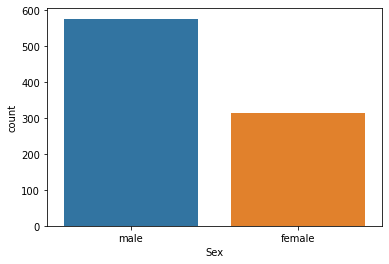

In [10]:
sns.countplot(df['Sex'])

print((df['Sex'].value_counts()/891)*100)

### SibSp

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


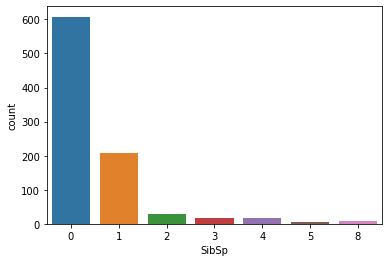

In [11]:
sns.countplot(df['SibSp'])

print((df['SibSp'].value_counts()/891)*100)

### Parch

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


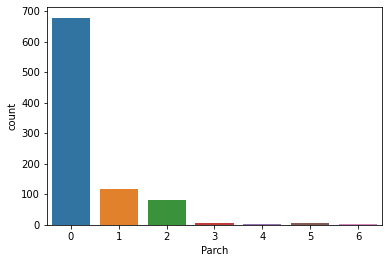

In [12]:
sns.countplot(df['Parch'])

print((df['Parch'].value_counts()/891)*100)

### Embarked

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


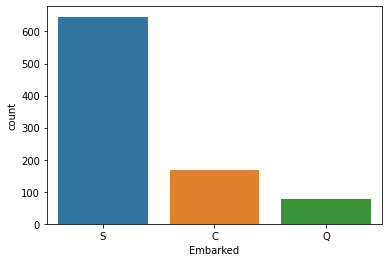

In [13]:
sns.countplot(df['Embarked'])

print((df['Embarked'].value_counts()/891)*100)

### Age

In [ ]:
sns.distplot(df['Age'])

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [ ]:
print("Skew: ",df['Age'].skew())
print("Kurtosis: ",df['Age'].kurt())

In [ ]:
sns.boxplot(df['Age'])

### Fare

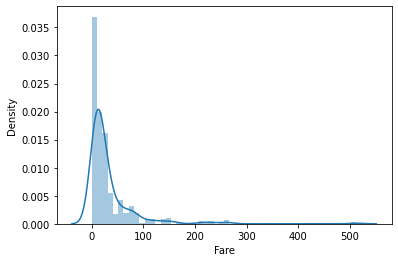

In [17]:
sns.distplot(df['Fare'])

In [18]:
print("Skew: ",df['Fare'].skew())
print("Kurtosis: ",df['Fare'].kurt())

Skew:  4.787316519674893
Kurtosis:  33.39814088089868


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


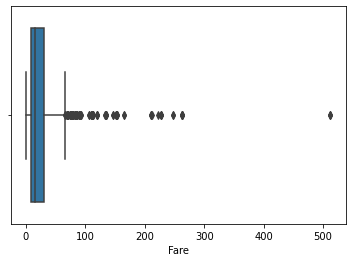

In [19]:
sns.boxplot(df['Fare'])

## Bivariate analysis

### Sex - Survived

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


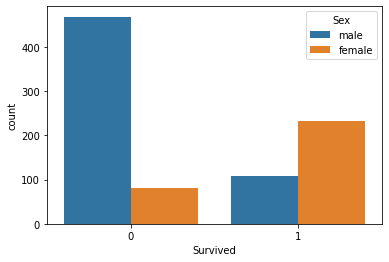

In [20]:
sns.countplot(df['Survived'],hue=df['Sex'])
pd.crosstab(df['Sex'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

### Pclass - Survived

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


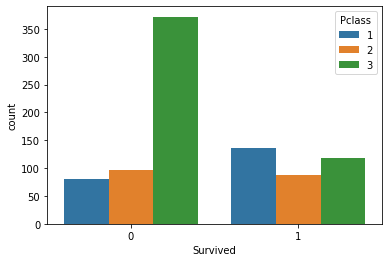

In [21]:
sns.countplot(df['Survived'],hue=df['Pclass'])
pd.crosstab(df['Pclass'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

### Embarked - Survived

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


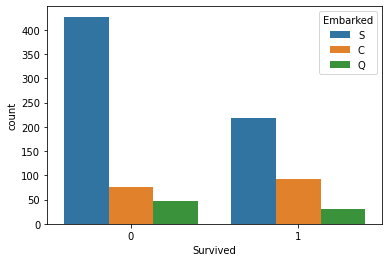

In [22]:
sns.countplot(df['Survived'],hue=df['Embarked'])
pd.crosstab(df['Embarked'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

### Age - Survived

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


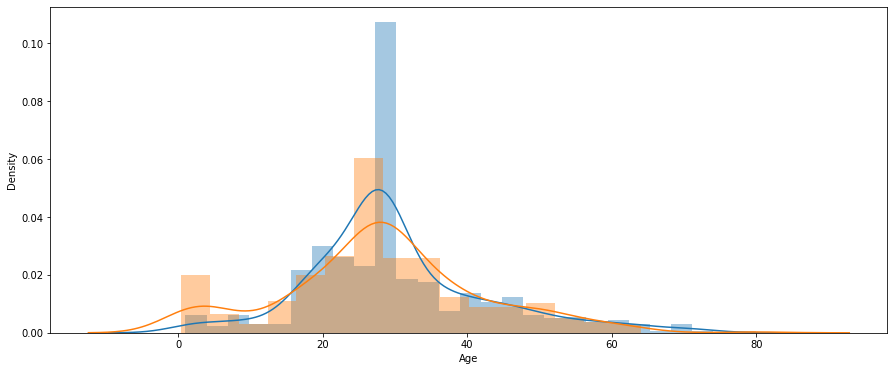

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age']) #blue
sns.distplot(df[df['Survived']==1]['Age']) #orange

### Fare - Survived

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


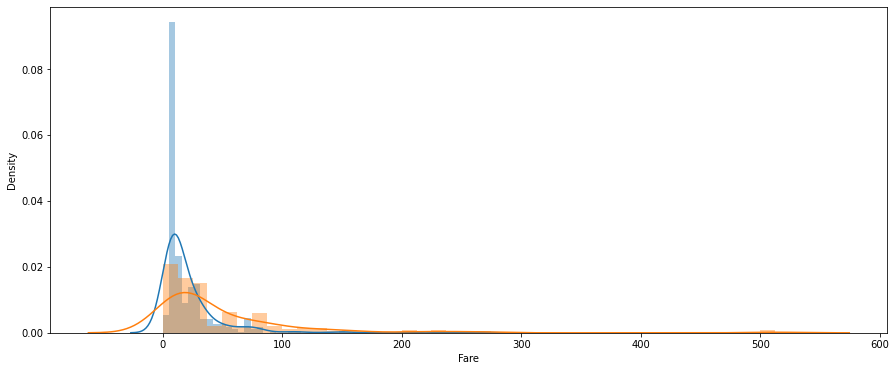

In [24]:
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare']) #blue
sns.distplot(df[df['Survived']==1]['Fare']) #orange

## Multivariate analysis

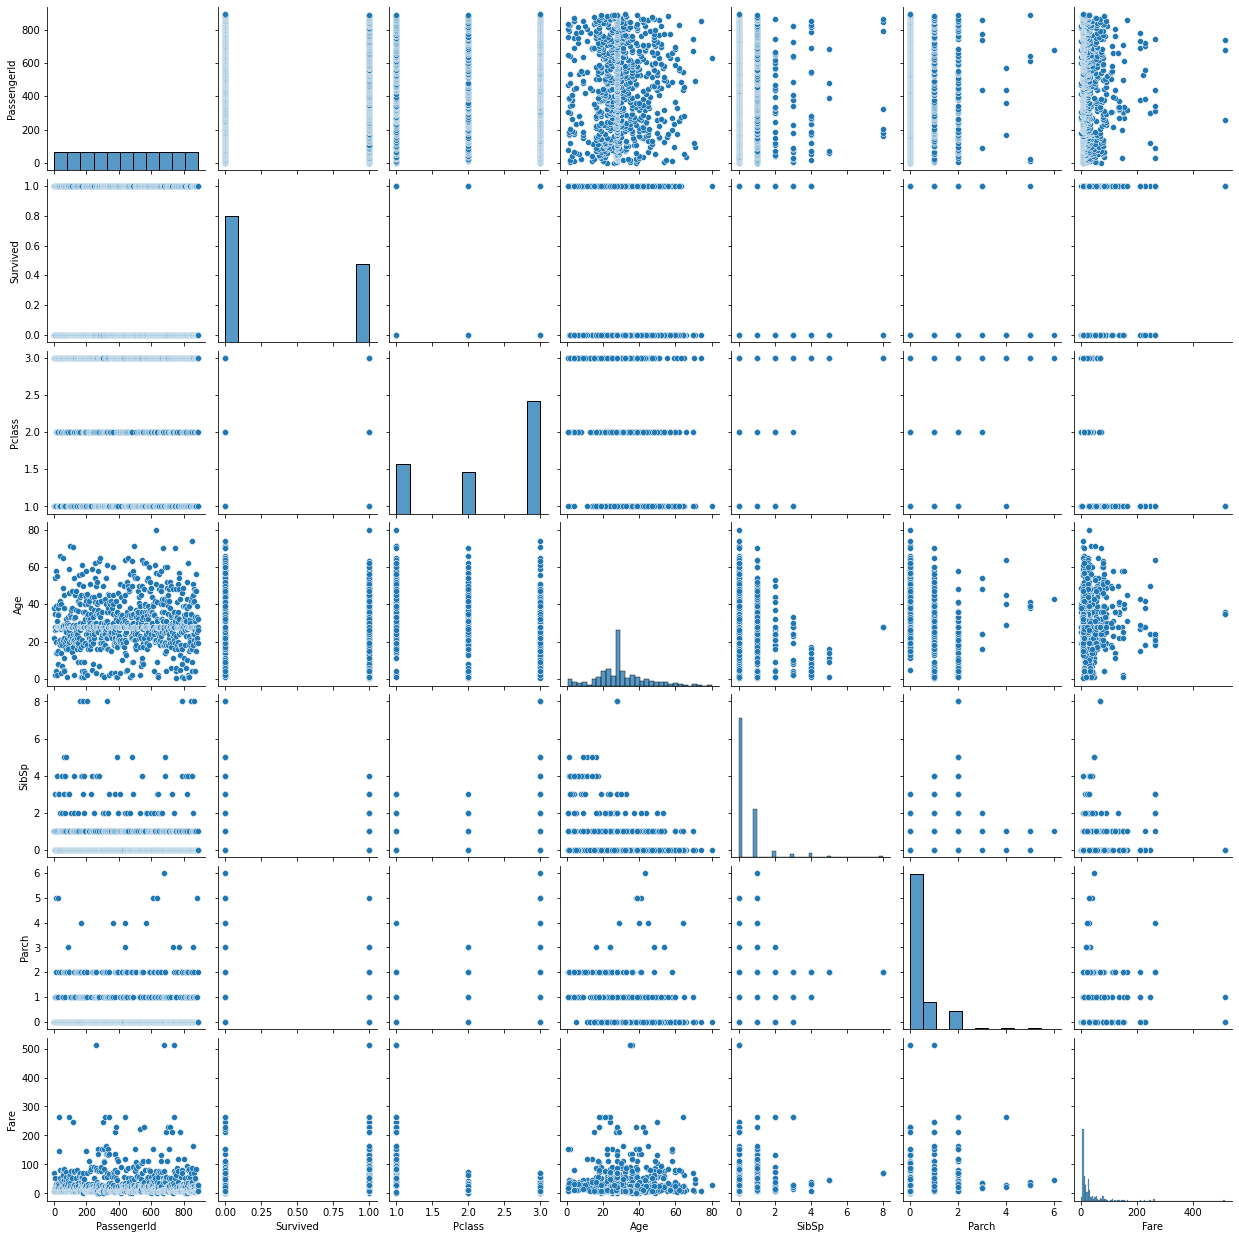

In [25]:
sns.pairplot(df)

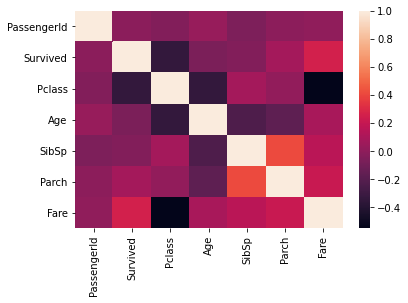

In [26]:
sns.heatmap(df.corr())

# Data preprocessing

## Creating categories

In [27]:
def Family_type(number):
    if number==0:
        return 'Alone'
    elif number>0 and number<=4:
        return 'Medium'
    else:
        return 'Large'
def Transform_data(df):
    df['Family_size']=df['Parch']+df['SibSp']
    df['Family_type']=df['Family_size'].apply(Family_type)
    df.drop(columns=['SibSp', 'Parch', 'Family_size'], inplace=True)
    df.loc[ df['Age'] <= 16, 'Age'] = 1
    df.loc[(df['Age'] > 16) & (df['Age'] <= 26), 'Age'] = 2
    df.loc[(df['Age'] > 26) & (df['Age'] <= 36), 'Age'] = 3
    df.loc[(df['Age'] > 36) & (df['Age'] <= 62), 'Age'] = 4
    df.loc[ df['Age'] > 62, 'Age'] = 5
    df.loc[df['Fare'] <= 17, 'Fare'] = 1,
    df.loc[(df['Fare'] > 17) & (df['Fare'] <= 30), 'Fare'] = 2,
    df.loc[(df['Fare'] > 30) & (df['Fare'] <= 100), 'Fare'] = 3,
    df.loc[ df['Fare'] > 100, 'Fare'] = 4
Transform_data(df)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,A/5 21171,1.0,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,4.0,PC 17599,3.0,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,STON/O2. 3101282,1.0,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,113803,3.0,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,3.0,373450,1.0,S,Alone


In [28]:
df=pd.get_dummies(data=df, columns=['Age' ,'Fare',  'Pclass', 'Sex', 'Embarked', 'Family_type'], drop_first=True)

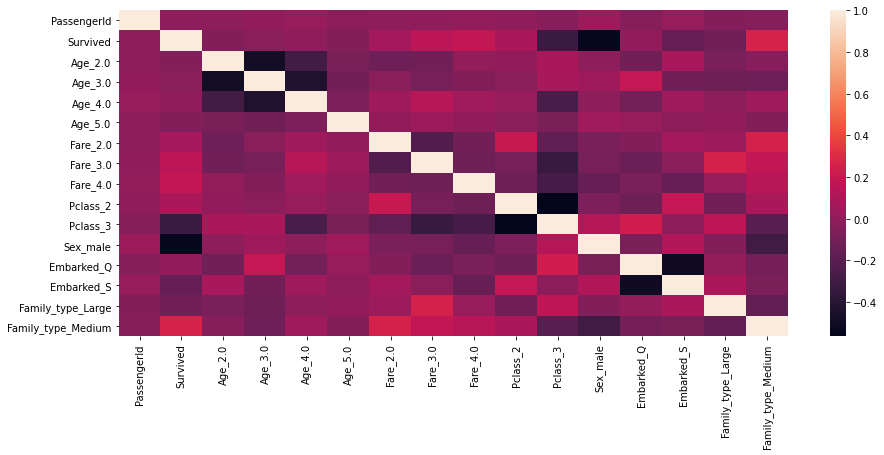

In [29]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr())

In [30]:
df.drop(columns=['Ticket', 'PassengerId', 'Name','Age_5.0'],inplace=True)
df.head()

,Survived,Age_2.0,Age_3.0,Age_4.0,Fare_2.0,Fare_3.0,Fare_4.0,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_type_Large,Family_type_Medium
0,0,1,0,0,0,0,0,0,1,1,0,1,0,1
1,1,0,0,1,0,1,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,1,0,1,0,0,1,0,0,0,0,0,1,0,1
4,0,0,1,0,0,0,0,0,1,1,0,1,0,0
